# Keep it Steady

_Solving steady-state one-dimensional differential equations with the finite difference approximations._

## Derivatives in Engineering equations

This Module is focused on solving engineering problems where the governing differential equations are across space and time. The general form of these differential equations are [Partial Differential Equations (check out the 3Blue1Brown video)](https://www.youtube.com/watch?v=ly4S0oi3Yz8). A partial differential equation (PDE) relates the derivatives in space and time. The main difference between _ordinary_ and _partial_ differential equations (ODEs and PDEs) is that ODEs only have one indendent variable e.g. all derivatives are $\frac{d^i}{dx^i}$. In PDEs, there are multiple derivatives, sometimes time and space. These equations come up in a number of engineering applications e.g. 

* [Conductive heat transfer](https://en.wikipedia.org/wiki/Heat_equation) $q(x,y,t)+\rho C_{p}\frac{\partial T}{\partial t} = -\kappa \nabla^2T$
* [Kirchoff plate mechanics](https://en.wikipedia.org/wiki/Kirchhoff%E2%80%93Love_plate_theory) $D\nabla^2 \nabla^2 w(x,y) = -q(x,y,t)-2\rho h \frac{\partial w^2}{\partial t^2}$
* [Euler Beam mechanics](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory) $EI \frac{\partial^4 w}{\partial x^4} = -\mu \frac{\partial^2 w}{\partial t^2}+q(x,t)$
* [Elastica Buckling equation](https://www.continuummechanics.org/columnbuckling.html) $EI\frac{d^2y}{dx^2}=-Py$
* ...

### Discussion

What other PDE equations describe engineering problems?

## One dimensional, steady-state differential equations

You can start your discussion of these differential equations with the steady-state solutions along one axis. These analyses include static deflection and buckling of beams and steady-state temperature through a pipe or heat fin. 

1. Steady-state Temperature: $-\kappa A \frac{d^2T}{dx^2}=Q(x)$

2. Static beam deflection: $EI \frac{\partial^4 w}{\partial x^4} = q(x)$

### Temperature in a fin meant to remove heat to enviroment

<!-- <img src="../images/thermal_fin.png" style="width: 500px;"/>  -->
<img
src="https://github.com/cooperrc/computational-mechanics/blob/master/images/thermal_fin.png?raw=true" style="width: 500px;"/> 

Consider the heat fin shown above, a hot substrate is at temperature $T_{base}$ and you want to remove heat with a cylindrical fin that is connected to the substrate. You know the base of the fin is the same temperature as the substrate, $T(x=0)=T_{0}=T_{base}$, but you do not know the heat flux into the fin, $\frac{dT}{dx}(0)=??$. We also do not know the temperature at the end of the fin, $T(L)=??$. So you could use your first [shooting method](https://github.uconn.edu/rcc02007/CompMech03-IVPs/blob/master/notebooks/04_Getting_to_the_root.ipynb), but you also have a new approach. We use our new knowledge of [Linear Algebra](https://github.uconn.edu/rcc02007/CompMech04-LinearAlgebra) and [finite differences](./01_Revisiting_derivatives.ipynb) to create a linear system of equations. 

Here is what you do know:

__Equations:__

$\frac{d^2T}{dx^2} \approx \frac{T_{i-1}-2T_{i}+T_{i+1}}{\Delta x^2}$

$-\kappa \pi R^2 \frac{T_{i-1}-2T_{i}+T_{i+1}}{\Delta x^2} = h2\pi R (T_{i}-T_{\infty})$

where , R is the radius of the cylinderical fin, $\Delta x$ is the step size, $\kappa$ is the conductive heat transfer of the fin, $h$ is the convective heat transfer between the fin and the environment. 

__Boundary Conditions:__

The base of the fin is the same temperature as the base, $T(x=0) = T_{base}=T_{0}.$

The tip of the fin has the same convective heat transfer as the rest of the fin, so the energy conducted to the tip has to be removed through convection, $hA(T(L)-T_{\infty})=-\kappa A\frac{dT}{dx} \rightarrow h(T_{6}-T_{\infty})=-\kappa \frac{T_{7}-T_{5}}{\Delta x}.$ 

1. $T_{0} = T_{base}$

2. $T_7=\frac{-h\Delta x}{k}(T_{6}-T_{\infty})+T_5$

If you divide the fin into 6 equally spaced sections, you have 6 equations with 6 unknown temperatures based upon finite difference equations as such,

1. $T_0-2T_1+T_2+\Delta x^2 h'(T_{\infty}-T_1) = 0$

2. $T_1-2T_2+T_3+\Delta x^2 h'(T_{\infty}-T_2) = 0$

3. $T_2-2T_3+T_3+\Delta x^2 h'(T_{\infty}-T_3) = 0$

4. $T_3-2T_4+T_4+\Delta x^2 h'(T_{\infty}-T_4) = 0$

5. $T_4-2T_5+T_5+\Delta x^2 h'(T_{\infty}-T_5) = 0$

6. $T_5-2T_6+T_7+\Delta x^2 h'(T_{\infty}-T_6) = 0 \leftarrow T_7 = \frac{-h\Delta x}{k}(T_{6}-T_{\infty})+T_5$

where $h'=\frac{2h}{\kappa R}$ is the modified convective heat transfer for the fin. And your boundary conditions give us values for $T_{0}~and~T_{7}.$ You can plug in constants for forced air convection, $h=100~W/m^2K$, aluminum fin, $\kappa=200~W/mK$, and 60-mm-long and 1-mm-radius fin, the air is room temperature, $T_{\infty}=20^oC$, and the base is $T_{base}=T_{0}=100^oC$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

In [2]:
h=100 # W/m/m/K
k=200 # W/m/K
R=1E-3# radius in m
L=60E-3# length in m

$\left[\begin{array}{cccccc}
2.1 & -1 & 0 & 0 & 0 & 0 \\
-1 & 2.1 & -1 & 0 & 0 & 0 \\
0 & -1 & 2.1 & -1 & 0 & 0 \\
0 & 0 & -1 & 2.1 & -1 & 0 \\
0 & 0 & 0 & -1 & 2.1 & -1 \\
0 & 0 & 0 & 0 & -2 & 2.105 \\
\end{array}\right]
\left[\begin{array}{c}
T_{1}\\
T_{2}\\
T_{3}\\
T_{4}\\
T_{5}\\
T_{6}\end{array}\right]=
\left[\begin{array}{c}
10+T_0\\
10\\
10\\
10\\
10\\
10+h\Delta x/k T_{\infty}\\
\end{array}\right]$

In [3]:
hp = 2*h/k/R
N=6
dx=L/N

print('h\' = {}, and step size dx= {}'.format(hp,dx))
diag_factor=2+hp*dx**2 # diagonal multiplying factor
print(diag_factor)
Tinfty=20
T0 = 100

A = np.diag(np.ones(N)*diag_factor)-np.diag(np.ones(N-1),-1)-np.diag(np.ones(N-1),1)
A[-1,-2]+= -1
A[-1,-1]+= h/k*dx
b = np.ones(N)*hp*Tinfty*dx**2
b[0]+=T0
b[-1]+=h*dx/k*(Tinfty)
print('finite difference A:\n------------------')
print(A)
print('\nfinite difference b:\n------------------')
print(b)
T=np.linalg.solve(A,b)
print('\nfinite difference solution T(x):\n------------------')
print(T)
print('\nfinite difference solution at x (mm)=\n------------------')
print(np.arange(1,7)*dx*1000)

h' = 1000.0, and step size dx= 0.01
2.1
finite difference A:
------------------
[[ 2.1   -1.     0.     0.     0.     0.   ]
 [-1.     2.1   -1.     0.     0.     0.   ]
 [ 0.    -1.     2.1   -1.     0.     0.   ]
 [ 0.     0.    -1.     2.1   -1.     0.   ]
 [ 0.     0.     0.    -1.     2.1   -1.   ]
 [ 0.     0.     0.     0.    -2.     2.105]]

finite difference b:
------------------
[102.    2.    2.    2.    2.    2.1]

finite difference solution T(x):
------------------
[79.5141801  64.97977822 54.94335415 48.4012655  44.6993034  43.46727164]

finite difference solution at x (mm)=
------------------
[10. 20. 30. 40. 50. 60.]


### Observing your set of equations

The equations and solution are shown above for the finite difference set of six coupled linear equations. You solved for the solutions of temperature at $x=[10,~20,~30,~40,~50,~60]~mm$. We didn't include a solution for $x=0~mm$ because it was included in your boundary conditions. If you specified the temperature at 
$x=60~mm$, then you would exclude that point as well. 

When you approximate a derivative as $\frac{df}{dx}\approx \frac{\Delta f}{\Delta x}$, what we're doing is changing a differential equation into a set of coupled equations. 

Below, lets compare your solution to the [analytical solution](https://en.wikipedia.org/wiki/Fin_(extended_surface)#Solutions) for a fin with the same boundary conditions

$T(x)=20+80\frac{\cosh(s(L-x))+\frac{h}{sk}\sinh(s(L-x))}{\cosh(sL)+\frac{h}{sk}\sinh(sL)}$

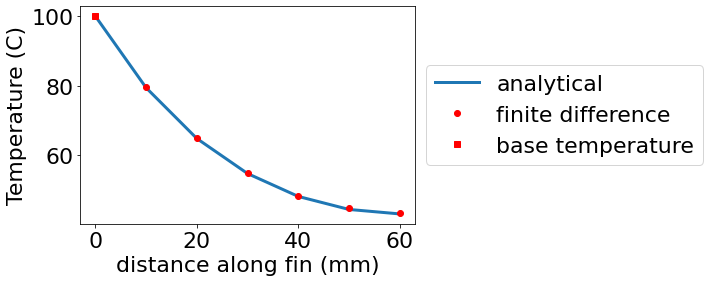

In [4]:
L=60e-3
s=np.sqrt(hp)
F=lambda x: 20+80*(np.cosh(s*L-s*x)+h/s/k*np.sinh(s*L-s*x))/(np.cosh(s*L)+h/s/k*np.sinh(s*L))
x=np.arange(0,N+1)*dx
plt.plot(x*1000,F(x),label='analytical')#a*np.cosh(s*x)+b*np.sinh(s*x))
plt.plot(x[1:]*1000,T,'ro',label='finite difference')
plt.plot(x[0],100,'rs',label='base temperature')
plt.xlabel('distance along fin (mm)')
plt.ylabel('Temperature (C)')
plt.legend(bbox_to_anchor=(1,0.5),loc='center left');

### Exercise

Decrease $\Delta x$ from $10~mm$ to $5~mm$. 

a. Make a plot of the Temperature along the fin. 

b. Plot the heat flux through the fin $-\kappa \frac{dT}{dx}$

## Static beam deflections

In the [Module 04 project](https://github.uconn.edu/rcc02007/CompMech04-LinearAlgebra), you solved a finite element analysis problem with stretching beams. A beam is very stiff in tension and compression, but it is usually much less stiff if bent. The [Euler-Bernoulli](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory) beam theory relates the static deflection of a beam, $w(x)$, to the bending stiffness, $EI$,  and applied load, $q$ as such

$EI \frac{d^4w}{dx^4} = q.$

If $q=q(x)=constant=q_0$, then the equation can be integrated $\times4$ to create a polynomial of order 4

$w'''(x)=q_0x+A$

$w''(x)=\frac{q_0x^2}{2}+Ax+B$

$w'(x)=\frac{q_0x^3}{6}+\frac{Ax^2}{2}+Bx+C$

$w(x)=\frac{q_0x^4}{24}+\frac{Ax^3}{6}+\frac{Bx^2}{2}+Cx+D$

where $A,~B,~C,~and~D$ are integration constants. You have four unknowns, so you need four boundary conditions. 

Let's consider the [simply supported beam](https://www.efunda.com/formulae/solid_mechanics/beams/casestudy_display.cfm?case=simple_uniformload) with a uniform load. You are considering linear beam mechanics, so you have an underlying assumption that the tension in the beam is negligible. The loads and boundary constraints are shown at the top of the figure below. 

![Boundary conditions for 4 different beam supports](../images/beams_BCs.png)

solving for A, B, C, and D there results

$w(x) = -\frac{qx\left(L^3-2x^2L+x^3\right)}{24EI},$

but you can use the same finite difference method you used above to solve for the deflection $w(x_i)$ at different locations, $x_i$. You begin creating the numerical solution with the same process you did with the heat transfer problem, you estimate the _differential equation_ as a _finite difference_ equation and use the following material and geometry (1-m steel rod 1-cm-by-1-cm) with 100 N/m load applied

* $L=1~m$
* $E=200e9~Pa$
* $I=\frac{0.01^4}{12}~m^4$
* $q=100~N/m$

__Finite difference equation dividing bar length $L$ into 6 segments:__

* $\frac{d^4w}{dx^4} \approx \frac{w(x_{i+2})−4w(x_{i+1})+6w(x_i)−4w(x_{i-1})+w(x_{i-2})}{h^4}=\frac{q}{EI}.$

1. $w_{-1} - 4w_0 +6w_1-4w_2+w_3 =\frac{q}{EI}h^4$

2. $w_{0} - 4w_1 +6w_2-4w_3+w_4 =\frac{q}{EI}h^4$

3. $w_{1} - 4w_2 +6w_3-4w_4+w_5 =\frac{q}{EI}h^4$

4. $w_{2} - 4w_3 +6w_4-4w_5+w_6 =\frac{q}{EI}h^4$

5. $w_{3} - 4w_4 +6w_5-4w_6+w_7 =\frac{q}{EI}h^4$

__Boundary Conditions:__

* $w(0)=0=w_0$
* $w(L)=0=w_6$
* $w''(0)=0=\frac{w_{-1}-2w_{0}+w_{1}}{h^2} \rightarrow w_{-1}=-w_{1}$
* $w''(L)=0=\frac{w_{5}-2w_{6}+w_{7}}{h^2} \rightarrow w_{7}=-w_{5}$

__Final linear equation set:__

1. $5w_1-4w_2+w_3 =\frac{q}{EI}h^4$

2. $-4w_1 +6w_2-4w_3+w_4 =\frac{q}{EI}h^4$

3. $w_{1} - 4w_2 +6w_3-4w_4+w_5 =\frac{q}{EI}h^4$

4. $w_{2} - 4w_3 +6w_4-4w_5+w_6 =\frac{q}{EI}h^4$

5. $w_{3} - 4w_4 +5w_5-4w_6 =\frac{q}{EI}h^4$

$\left[\begin{array}{cccccc}
5 & -4 & 1 & 0 & 0  \\
-4 & 6 & -4 & 1 & 0 \\
1 & -4 & 6 & -4 & 1 \\
0 & 1 & -4 & 6 & -4 \\
0 & 0 & 1 & -4 & 5 
\end{array}\right]
\left[\begin{array}{c}
w_{1}\\
w_{2}\\
w_{3}\\
w_{4}\\
w_{5}
\end{array}\right]=
\frac{qh^4}{EI}\left[\begin{array}{c}
1\\
1\\
1\\
1\\
1
\end{array}\right]$

In [5]:
L=1
h=L/6
E=200e9
I=0.01**4/12
q=100

A=np.diag(np.ones(5)*6)\
+np.diag(np.ones(4)*-4,-1)\
+np.diag(np.ones(4)*-4,1)\
+np.diag(np.ones(3),-2)\
+np.diag(np.ones(3),2)
A[0,0]+=-1
A[-1,-1]+=-1

b=-np.ones(5)*q/E/I*h**4

w=np.linalg.solve(A,b)
xnum=np.arange(0,L+h/2,h)
print('finite difference A:\n------------------')
print(A)
print('\nfinite difference b:\n------------------')
print(b)
print('\ndeflection of beam (mm)\n-------------\n',w*1000)
print('at position (m) \n-------------\n',xnum[1:-1])

finite difference A:
------------------
[[ 5. -4.  1.  0.  0.]
 [-4.  6. -4.  1.  0.]
 [ 1. -4.  6. -4.  1.]
 [ 0.  1. -4.  6. -4.]
 [ 0.  0.  1. -4.  5.]]

finite difference b:
------------------
[-0.00046296 -0.00046296 -0.00046296 -0.00046296 -0.00046296]

deflection of beam (mm)
-------------
 [-4.05092593 -6.94444444 -7.98611111 -6.94444444 -4.05092593]
at position (m) 
-------------
 [0.16666667 0.33333333 0.5        0.66666667 0.83333333]


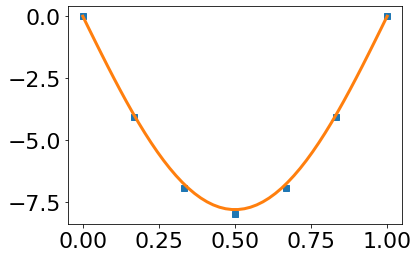

In [6]:
x=np.linspace(0,L)
w_an=-q*x*(L**3-2*x**2*L+x**3)/24/E/I

plt.plot(xnum,np.block([0,w*1000,0]),'s')
plt.plot(x,w_an*1000)

### Exercise 

Divide the simply-supported beam into 12 sections and plot the deflection as a function of distance along the beam with a uniform load.

### Discussion

What is the convergence rate for this central difference method? _Hint: check the magnitude of round-off error for [central difference methods](./01_Revisiting_derivatives.ipynb)._

## What You've Learned

* The difference between a _PDE_ and an _ODE_
* How to approximate differential equations with boundary conditions
* Solve steady-state heat transfer problem
* Solve static deflection of elastic beam
* Demonstrate convergence of finite difference solutions